# **Multicollinearity**

Multicollinearity is a statistical phenomenon that can significantly affect the performance and interpretability of regression models. 

It occurs when independent variables in a regression model are highly correlated, leading to unreliable coefficient estimates and inflated standard errors. 

This can make it difficult to determine the individual effect of each variable on the dependent variable, ultimately reducing the model's predictive power and interpretability. Addressing multicollinearity is crucial for building robust and reliable regression models.

This includes:-
- **Inflated Standard Errors:** Coefficients become less statistically significant.
- **Unstable Coefficients:** Samll changes in data can lead to large coefficient variations.
- **Reduced Model Interpretability:** Difficulty un determining the impact of individual variables.

**How to detect Collinearity**
1. Correlation Matrix: Look for high correlatn. b/w predictors(>0.9).
2. Variance Inflation Factors(VIF): A VIF > 10 suggests high multicollinearity.
3. Condition Index: Values > 30 indicate potential multicollinearity.


**Correlation Matrix**

Bivariate Correlationbetween two features:-
- +1: Perfect +ve correlation(both variables increase together).
- -1: Perfect -ve correlation(one increases other decreases).
- 0: No linear relationship.


**VIF**

Variance Inflation Factor measures how much the variance of a regression coefficient is inflated due to multicollinearity.

VIFi = 1/(1-Ri^2)           [Higher R^2 = Higher VIF]

Ri^2: Coefficient of determination when Xi is regressed on the other predictors.
- VIF = 1 - No multicollinearity
- 1 < VIF < 5 - Moderate Collinearity
- VIF > 10 - High Multicollinearity


**Condition Index**

Condition Index(CI) is derieved from the eigenvalues of the predictor matrix in a regression model.
It measures the sensitivity of the regression coefficients to small changes in the data.

LAMBDA_max: Largest eigenvalues of the predictor matrix.

LAMBDA_i: Each eigenvalues of the predictor matrix.

CI = sqrt(LAMBDA_max/LAMBDA_i)

- CI < 10: Little/No Multicollinearity
- CI = 10-30: Moderate Multicollinearity
- CI > 30: Severe Collinearity


**How to fix Multicollinearity**
- Remove Redundant Variables: Exclude highly correlated predictors. Start with on of two or more highly correlated values.
- Combine Predictors: Use techniques like PCA or create a new feature.
- Regularization Techniques: Apply Ridge or Lasso Regression to stabilize coefficients.

In [53]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [54]:
np.random.seed(80)

In [55]:
num_players = 1000
batting_averages = np.random.normal(0.28, 0.05, num_players)
batting_averages = np.clip(batting_averages, 0.1, 0.5)  # Ensure averages are within a realistic range
AB = np.random.randint(300, 700, num_players)
H = AB * batting_averages
height = np.random.normal(60, 6, num_players)  # Height in inches
wind = np.random.uniform(-1.5, 1.5, num_players)  # Wind speed in mph
RBI = (H*0.5) + (AB*0.02) + (height*0.01) + (wind*7) + np.random.normal(0, 10, num_players)
RBI_rounded = np.round(RBI)
AB_rounded = np.round(AB)
H_rounded = np.round(H)

In [56]:
data = pd.DataFrame({
    'batting_average': batting_averages,
    'AB': AB_rounded,
    'H': H_rounded,
    'height': height,
    'wind': wind,
    'RBI': RBI_rounded
})

data.head()

,batting_average,AB,H,height,wind,RBI
0,0.374993,411,154.0,58.345840,0.988117,103.0
1,0.290440,669,194.0,55.845501,0.631080,113.0
2,0.324761,663,215.0,67.806541,0.748516,139.0
3,0.220964,567,125.0,63.826689,0.302692,68.0
4,0.293677,486,143.0,61.049233,-0.621844,63.0


In [57]:
X = data.drop(columns=['RBI'], axis=1)
y = data['RBI']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test_scaled)
display(display(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})))

,Actual,Predicted
521,112.0,126.162390
737,116.0,113.098146
740,66.0,76.298083
660,102.0,100.901111
411,46.0,61.612051
...,...,...
408,64.0,70.007450
332,105.0,90.041967
208,74.0,72.154378
613,79.0,77.370734


None

In [62]:
print("R-squared LinearRegression:", r2_score(y_test, y_pred))
print("Mean Squared Error LinearRegression:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error LinearRegression:", root_mean_squared_error(y_test, y_pred))
print("Mean Absolute Error LinearRegression:", mean_absolute_error(y_test, y_pred))

R-squared LinearRegression: 0.8217931638675526
Mean Squared Error LinearRegression: 108.62675661944141
Root Mean Squared Error LinearRegression: 10.422416064398956
Mean Absolute Error LinearRegression: 8.619665600478806


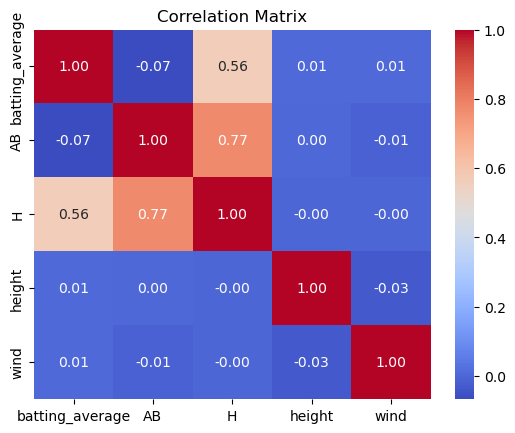

In [63]:
# Correlation matrix
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [64]:
#VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           feature         VIF
0  batting_average  112.609199
1               AB  125.896607
2                H  144.533467
3           height   96.539033
4             wind    1.001064


In [65]:
# CI
normalized_features = (X-X.mean()) / X.std()
covariance_matrix = np.cov(normalized_features.T)
eigenvalues, _ = np.linalg.eig(covariance_matrix)
condition_indices = np.sqrt(eigenvalues.max()/eigenvalues)

In [66]:
ci_data = pd.DataFrame({'Condition Index': condition_indices})
print(ci_data)

   Condition Index
0        14.554747
1         1.000000
2         1.412881
3         1.344428
4         1.366914


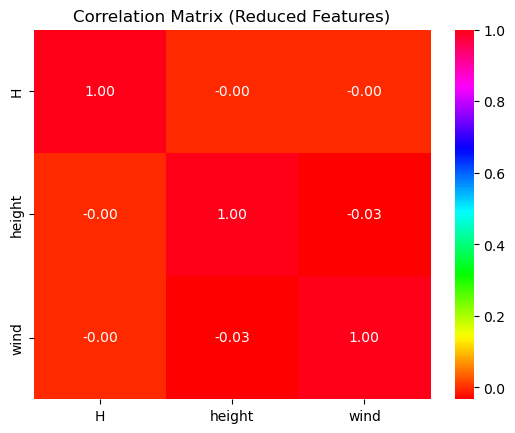

In [ ]:
X_reduce = X[['H', 'height', 'wind']]
#Correlation matrix reduced
corr_matrix_reduce = X_reduce.corr()
sns.heatmap(corr_matrix_reduce, annot=True, cmap='hsv', fmt='.2f')
plt.title('Correlation Matrix (Reduced Features)')
plt.show()

In [ ]:
#VIF Reduced
vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = X_reduce.columns
vif_data_2["VIF"] = [variance_inflation_factor(X_reduce.values, i) for i in range(X_reduce.shape[1])]
print(vif_data_2)

  feature        VIF
0       H  12.059913
1  height  12.061131
2    wind   1.000436


In [ ]:
# CI Reduced
normalized_features_2 = (X_reduce-X_reduce.mean()) / X_reduce.std()
covariance_matrix_2 = np.cov(normalized_features_2.T)
eigenvalues_2, _ = np.linalg.eig(covariance_matrix_2)
condition_indices_2 = np.sqrt(eigenvalues_2.max()/eigenvalues_2)

In [70]:
ci_data_2 = pd.DataFrame({'Condition Index': condition_indices_2})
print(ci_data_2)

   Condition Index
0         1.033862
1         1.016145
2         1.000000


In [74]:
model_reduce = LinearRegression()
model_reduce.fit(X_train[['H', 'height', 'wind']], y_train)

LinearRegression()

In [75]:
y_pred_reduce = model_reduce.predict(X_test[['H', 'height', 'wind']])
display(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_reduce}))

,Actual,Predicted
521,112.0,127.821483
737,116.0,113.163232
740,66.0,75.616765
660,102.0,100.189012
411,46.0,64.248467
...,...,...
408,64.0,69.473521
332,105.0,89.785551
208,74.0,72.000934
613,79.0,76.078008


In [76]:
print("R-squared LinearRegression Reduced:", r2_score(y_test, y_pred_reduce))
print("Mean Squared Error LinearRegression Reduced:", mean_squared_error(y_test, y_pred_reduce))
print("Root Mean Squared Error LinearRegression Reduced:", root_mean_squared_error(y_test, y_pred_reduce))
print("Mean Absolute Error LinearRegression Reduced:", mean_absolute_error(y_test, y_pred_reduce))

R-squared LinearRegression Reduced: 0.8168786526216717
Mean Squared Error LinearRegression Reduced: 111.62241845035481
Root Mean Squared Error LinearRegression Reduced: 10.565151132395354
Mean Absolute Error LinearRegression Reduced: 8.713625988234773


In [78]:
print(corr_matrix)
print(corr_matrix_reduce)

                 batting_average        AB         H    height      wind
batting_average         1.000000 -0.066722  0.564637  0.007123  0.006650
AB                     -0.066722  1.000000  0.774361  0.003715 -0.013661
H                       0.564637  0.774361  1.000000 -0.002120 -0.003774
height                  0.007123  0.003715 -0.002120  1.000000 -0.033001
wind                    0.006650 -0.013661 -0.003774 -0.033001  1.000000
               H    height      wind
H       1.000000 -0.002120 -0.003774
height -0.002120  1.000000 -0.033001
wind   -0.003774 -0.033001  1.000000


In [84]:
# PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [85]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

LinearRegression()

In [86]:
y_pred_pca = model_pca.predict(X_test_pca)
display(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca}))

,Actual,Predicted
521,112.0,115.202023
737,116.0,123.552843
740,66.0,81.904979
660,102.0,98.126275
411,46.0,72.663475
...,...,...
408,64.0,69.069427
332,105.0,85.803538
208,74.0,70.853524
613,79.0,86.672701


In [88]:
print("R-squared LinearRegression PCA:", r2_score(y_test, y_pred_pca))
print("Mean Squared Error LinearRegression PCA:", mean_squared_error(y_test, y_pred_pca))
print("Root Mean Squared Error LinearRegression PCA:", root_mean_squared_error(y_test, y_pred_pca))
print("Mean Absolute Error LinearRegression PCA:", mean_absolute_error(y_test, y_pred_pca))

R-squared LinearRegression PCA: 0.7384148399058363
Mean Squared Error LinearRegression PCA: 159.45037877047284
Root Mean Squared Error LinearRegression PCA: 12.627366264208575
Mean Absolute Error LinearRegression PCA: 10.230915630232792
